In [13]:
from PIL import Image
import os, glob
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [14]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/dasol/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [15]:
image_dir_path = os.getenv("HOME") + "/aiffel/rsp_test/rock_scissor_paper_v3/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

image_dir_path = os.getenv("HOME") + "/aiffel/rsp_test/rock_scissor_paper_v3/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("paper 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/dasol/aiffel/rsp_test/rock_scissor_paper_v3/rock
이미지 디렉토리 경로:  /home/dasol/aiffel/rsp_test/rock_scissor_paper_v3/paper
paper 이미지 resize 완료!


In [16]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("이미지 개수는",idx)
    return imgs, labels

이미지 개수는 300
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)
라벨:  1


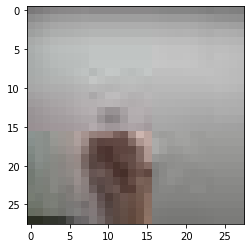

In [17]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_v2"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

import matplotlib.pyplot as plt
plt.imshow(x_train[100])
print('라벨: ', y_train[100])

In [18]:
def create_model():
  model = keras.models.Sequential()
  model.add(keras.layers.Conv2D(filters=64, kernel_size = 3, activation = 'relu', padding='SAME', input_shape=(28, 28, 3)))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='SAME'))
  model.add(keras.layers.MaxPool2D(padding='SAME'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dropout(0.4))
  model.add(keras.layers.Dense(3, activation='softmax'))
  return model

In [19]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
10/10 [==============================] - 2s 153ms/step - loss: 1.1196 - accuracy: 0.2933
Epoch 2/20
10/10 [==============================] - 1s 142ms/step - loss: 1.0906 - accuracy: 0.3900
Epoch 3/20
10/10 [==============================] - 1s 138ms/step - loss: 1.0363 - accuracy: 0.5333
Epoch 4/20
10/10 [==============================] - 1s 123ms/step - loss: 0.8268 - accuracy: 0.7000
Epoch 5/20
10/10 [==============================] - 1s 90ms/step - loss: 0.5642 - accuracy: 0.7567
Epoch 6/20
10/10 [==============================] - 1s 124ms/step - loss: 0.3426 - accuracy: 0.8833
Epoch 7/20
10/10 [==============================] - 1s 128ms/step - loss: 0.2631 - accuracy: 0.9000
Epoch 8/20
10/10 [==============================] - 1s 96ms/step - loss: 0.1820 - accuracy: 0.9467
Epoch 9/20
10/10 [==============================] - 1s 116ms/step - loss: 0.1133 - accuracy: 0.9633
Epoch 10/20
10/10 [==============================] - 1s 114ms/step - loss: 0.0524 - accuracy: 0.9867
E

이미지 개수는 300
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
라벨:  1


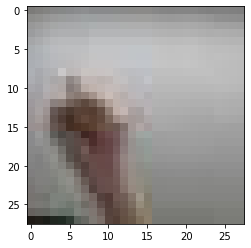

In [21]:
test_dir_path = os.getenv("HOME") + "/aiffel/rsp_test/rock_scissor_paper_v3"
(x_test, y_test)=load_data(test_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[100])
print('라벨: ', y_test[100])

In [22]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.1090 - accuracy: 0.7567
test_loss: 1.1089646816253662 
test_accuracy: 0.7566666603088379
